In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# 1. 데이터 불러오기
x_iqr = pd.read_csv("x_iqr.csv")
y_iqr = pd.read_csv("y_iqr.csv")

In [17]:
x_iqr.shape

(59188, 341)

In [3]:
# 변수 선택 : 1. 다중공선성 제거
from statsmoRobustScalertats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_iqr.values, i) for i in range(x_iqr.shape[1])]
vif["features"] = x_iqr.columns

new_columns = list(vif.loc[vif["VIF Factor"]<10]['features'])

C:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [16]:
x_iqr[new_columns].shape

(59188, 100)

In [6]:
from sklearn.preprocessing import RobustScaler
# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(x_iqr[new_columns], y_iqr.iloc[:,0], test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

# StandardScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

=============Train=============
Training MSE : 1.248
Training RMSE : 1.117
Training MAE : 0.829
Training MAPE : 1.460
Training R2 : 0.122

=============Test=============
None
Testing MSE : 1.312
Testing RMSE : 1.145
Testing MAE : 0.852
Testing MAPE : 1.502
Testing R2 : 0.121


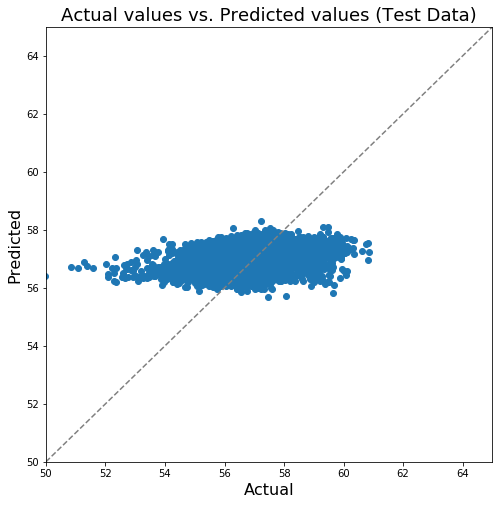

In [8]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression().fit(X_train, Y_train)

train_y_pred = model_LR.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_LR.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
model_rfr_st = RandomForestRegressor(oob_score=True).fit(X_train, Y_train)

train_y_pred_st = model_rfr_st.predict(X_train)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

test_y_pred_st = model_rfr_st.predict(X_test)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))


=============Train=============
RobustScaler
Training MSE : 0.150
Training RMSE : 0.387
Training MAE : 0.285
Training MAPE : 0.501
Training R2 : 0.895

=============Test=============
RobustScaler
Training MSE : 1.101
Training RMSE : 1.049
Training MAE : 0.781
Training MAPE : 1.375
Training R2 : 0.263


=============Train=============
Training MSE : 1.421
Training RMSE : 1.192
Training MAE : 0.885
Training MAPE : 1.561
Training R2 : 0.000

=============Test=============
None
Testing MSE : 1.494
Testing RMSE : 1.222
Testing MAE : 0.908
Testing MAPE : 1.601
Testing R2 : -0.000


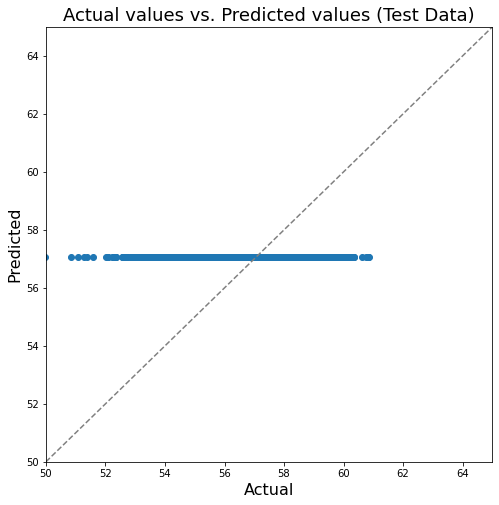

In [86]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso().fit(X_train, Y_train)

train_y_pred = model_Lasso.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Lasso.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 1.248
Training RMSE : 1.117
Training MAE : 0.829
Training MAPE : 1.460
Training R2 : 0.122

=============Test=============
None
Testing MSE : 1.312
Testing RMSE : 1.145
Testing MAE : 0.852
Testing MAPE : 1.502
Testing R2 : 0.121


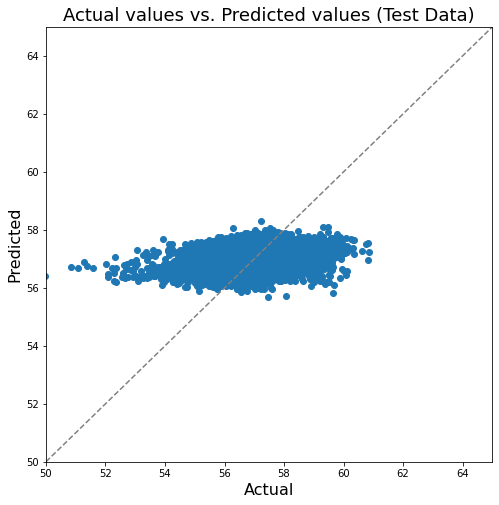

In [87]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge().fit(X_train, Y_train)

train_y_pred = model_Ridge.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Ridge.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 1.421
Training RMSE : 1.192
Training MAE : 0.885
Training MAPE : 1.561
Training R2 : 0.000

=============Test=============
None
Testing MSE : 1.312
Testing RMSE : 1.145
Testing MAE : 0.852
Testing MAPE : 1.502
Testing R2 : 0.121


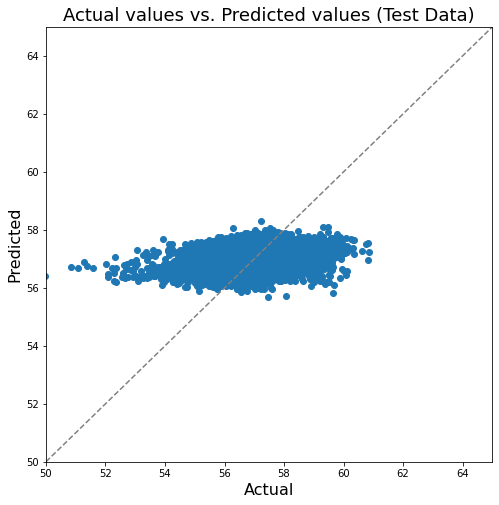

In [88]:
from sklearn.linear_model import ElasticNet

model_Elastic = ElasticNet().fit(X_train, Y_train)

train_y_pred = model_Elastic.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Ridge.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

<AxesSubplot:>

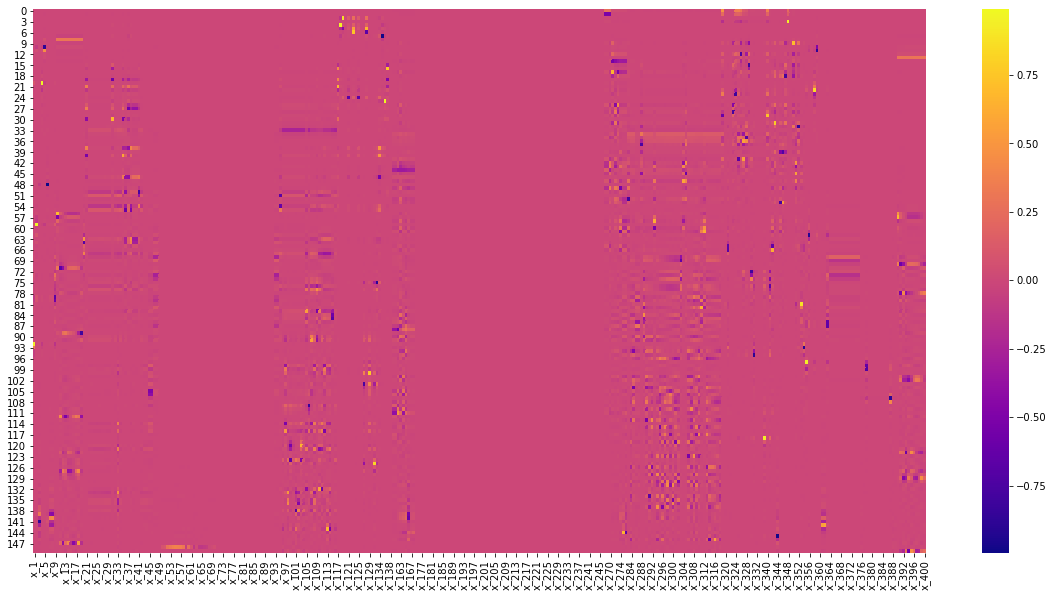

In [102]:
# 차원 축소 : PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
data_reduced = pca.fit_transform(x_iqr)

# Principal Component 구성 성분 분석
df_comp = pd.DataFrame(pca.components_,columns=list(x_iqr))
plt.figure(figsize=(20,10))
sns.heatmap(df_comp,cmap='plasma',)

In [103]:
from sklearn.preprocessing import StandardScaler

# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(data_reduced, y_iqr.iloc[:,2].values, test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

# StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

=============Train=============
Training MSE : 0.719
Training RMSE : 0.848
Training MAE : 0.638
Training MAPE : 1.104
Training R2 : 0.170

=============Test=============
None
Testing MSE : 0.744
Testing RMSE : 0.863
Testing MAE : 0.647
Testing MAPE : 1.119
Testing R2 : 0.174


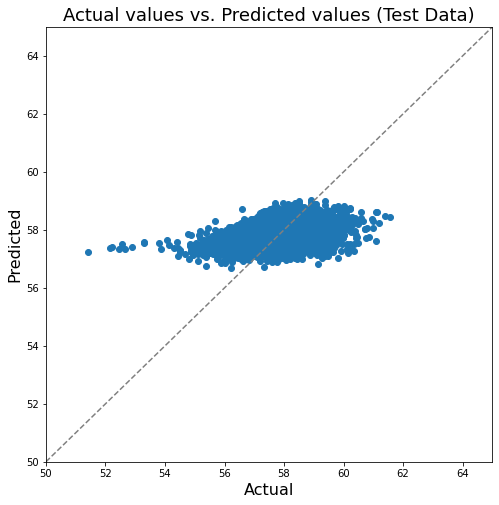

In [104]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression().fit(X_train, Y_train)

train_y_pred = model_LR.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_LR.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 0.867
Training RMSE : 0.931
Training MAE : 0.689
Training MAPE : 1.194
Training R2 : 0.000

=============Test=============
None
Testing MSE : 0.901
Testing RMSE : 0.949
Testing MAE : 0.702
Testing MAPE : 1.217
Testing R2 : -0.000


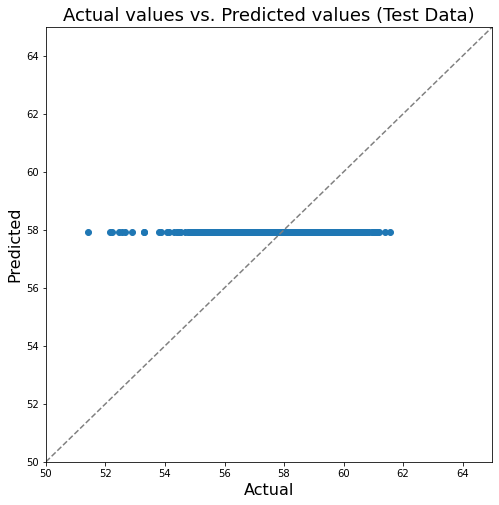

In [105]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso().fit(X_train, Y_train)

train_y_pred = model_Lasso.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Lasso.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 0.719
Training RMSE : 0.848
Training MAE : 0.638
Training MAPE : 1.104
Training R2 : 0.170

=============Test=============
None
Testing MSE : 0.744
Testing RMSE : 0.863
Testing MAE : 0.647
Testing MAPE : 1.119
Testing R2 : 0.174


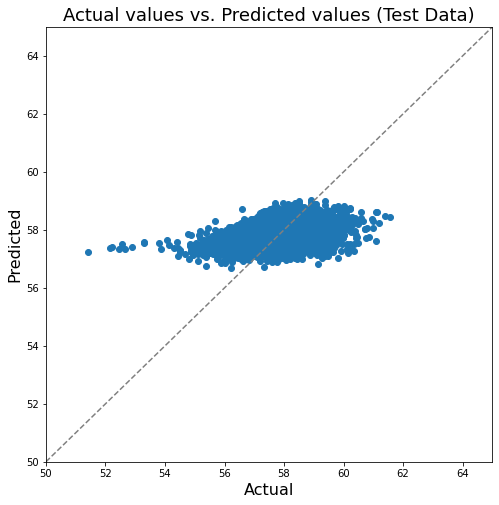

In [106]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge().fit(X_train, Y_train)

train_y_pred = model_Ridge.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Ridge.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 0.867
Training RMSE : 0.931
Training MAE : 0.689
Training MAPE : 1.194
Training R2 : 0.000

=============Test=============
None
Testing MSE : 0.744
Testing RMSE : 0.863
Testing MAE : 0.647
Testing MAPE : 1.119
Testing R2 : 0.174


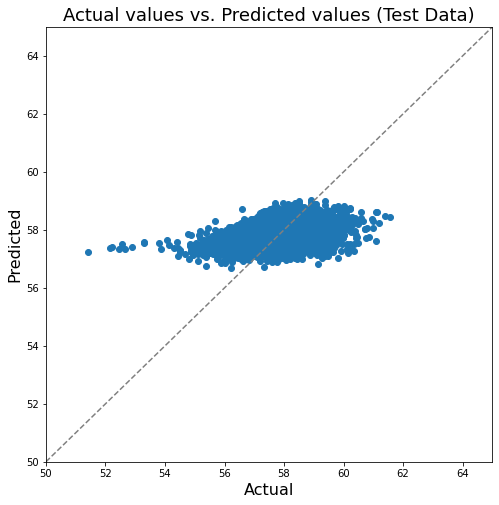

In [107]:
from sklearn.linear_model import ElasticNet

model_Elastic = ElasticNet().fit(X_train, Y_train)

train_y_pred = model_Elastic.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Ridge.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 0.368
Training RMSE : 0.607
Training MAE : 0.457
Training MAPE : 0.790
Training R2 : 0.575

=============Test=============
None
Testing MSE : 0.752
Testing RMSE : 0.867
Testing MAE : 0.651
Testing MAPE : 1.126
Testing R2 : 0.165


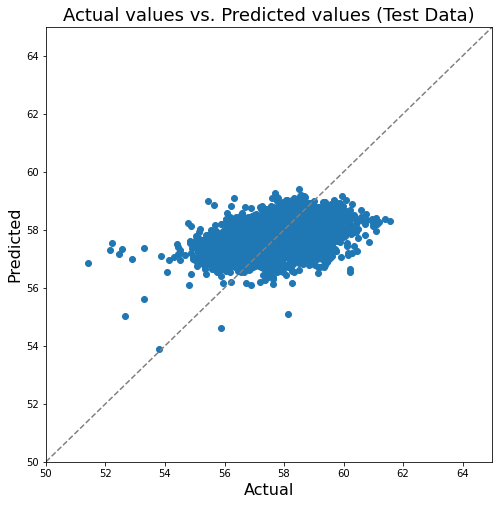

In [108]:
import xgboost
xgb_model = xgboost.XGBRegressor()

model_xgb = xgb_model.fit(X_train, Y_train)

train_y_pred = model_xgb.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_xgb.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()